In [1]:
import ast
import pandas as pd
import os
from parseHelper import SeriesStringDictToDataframe, CountListLength

In [5]:
%%time
fl=pd.read_csv('./clean_Json_updated_debug_Dec_17_2017.csv', chunksize=10000)
df = pd.concat([i for i in fl], ignore_index=True)
print df.shape
# %%time
# fl=pd.read_csv('./clean_Json_updated_debug_Dec_17_2017.csv', chunksize=10000)
# df=fl.next()
# print df.shape

(195185, 40)
CPU times: user 6.77 s, sys: 721 ms, total: 7.49 s
Wall time: 7.65 s


### fields still need further cleaning
#### find fields has dictionary structure stored as string
* print the first instance

In [9]:
toBeClean=[]
for i in df.select_dtypes(include=['object']):
    if (df[i].head(5).str.startswith('{')).sum()==5:
        toBeClean.append(i)
#         print i,
#         print df[i][0]
#         print
toBeClean

['about.cover_image',
 'about.location',
 'about.primary_currency',
 'about.reputation',
 'about.status',
 'about.timezone']

In [10]:
%%time
print df.shape
clean=[]
for i in toBeClean:
    clean.append(SeriesStringDictToDataframe(df[i]))
    df_new=pd.concat(clean,axis=1)
print df_new.shape

(195185, 40)
(195185, 110)
CPU times: user 3min, sys: 1.57 s, total: 3min 1s
Wall time: 3min 1s


#### concat

In [12]:
df = df.drop(toBeClean, axis=1)
df = pd.concat([df, df_new], axis=1)
df.shape

(195185, 144)

In [13]:
df.columns[df.columns.duplicated()]

Index([u'country', u'id'], dtype='object')

In [14]:
df.columns.get_duplicates()

[u'country', u'id']

#### rename duplicate columns

In [15]:
cols = pd.Series(df.columns)
for dup in df.columns.get_duplicates():
    cols[df.columns.get_loc(dup)]=[dup+'.'+str(d_idx) if d_idx!=0 else dup for d_idx in range(df.columns.get_loc(dup).sum())]
df.columns = cols

#### convert list
#### skip if you like to keep all info for now

In [17]:
df['job_history.job_counts_LEN'] = df['job_history.job_counts'].apply(len)

In [18]:
toBeCount=[]

for i in df.select_dtypes(include=['object']):
    if (df[i].head(5).str.startswith('[')).sum()==5:
        toBeCount.append(i)
        
# for i in toBeCount:  
#     print i
#     print df[i][100]
#     print
toBeCount

['resume.certifications',
 'resume.education',
 'resume.exams',
 'resume.experience',
 'resume.publications',
 'skills']

In [19]:
%%time
for i in toBeCount:
    df[i+'_LEN']=df[i].apply(CountListLength)

CPU times: user 1min 30s, sys: 149 ms, total: 1min 31s
Wall time: 1min 30s


In [20]:
df.shape

(195185, 151)

In [21]:
pd.options.display.max_columns=200

In [22]:
df.head()

,index,about.avatar,about.avatar_cdn,about.avatar_large,about.avatar_large_cdn,about.chosen_role,about.company,about.display_name,about.hourly_rate,about.id,about.primary_language,about.profile_description,about.public_name,about.recommendations,about.registration_date,about.registration_date_human,about.registration_date_localized,about.responsivenessText,about.role,about.tagline,about.username,about.username_sentence,hourlyRate,resume.certifications,resume.education,resume.exams,resume.experience,resume.publications,resume.show,skills,timeOffset,userId,username,public_firstname,current_image.description,current_image.height,current_image.id,current_image.url,current_image.width,past_images,administrative_area,city,country.code,country.demonym,country.flag_class,country.flag_url,country.flag_url_cdn,country.highres_flag_url,country.highres_flag_url_cdn,country.iso3,country.language_code,country.language_id,country.name,country.person,country.phone_code,country.region_id,country.sanction,country.seo_url,full_address,latitude,longitude,vicinity,code,country,exchange_rate,id,name,sign,earnings_score,entire_history.all,entire_history.category_ratings.communication,entire_history.category_ratings.expertise,entire_history.category_ratings.hire_again,entire_history.category_ratings.professionalism,entire_history.category_ratings.quality,entire_history.complete,entire_history.completion_rate,entire_history.earnings,entire_history.incomplete,entire_history.incomplete_reviews,entire_history.on_budget,entire_history.on_time,entire_history.overall,entire_history.positive,entire_history.rehire_rate,entire_history.reviews,job_history.count_other,job_history.job_counts,last12months.all,last12months.category_ratings.communication,last12months.category_ratings.expertise,last12months.category_ratings.hire_again,last12months.category_ratings.professionalism,last12months.category_ratings.quality,last12months.complete,last12months.completion_rate,last12months.earnings,last12months.incomplete,last12months.incomplete_reviews,last12months.on_budget,last12months.on_time,last12months.overall,last12months.positive,last12months.rehire_rate,last12months.reviews,last3months.all,last3months.category_ratings.communication,last3months.category_ratings.expertise,last3months.category_ratings.hire_again,last3months.category_ratings.professionalism,last3months.category_ratings.quality,last3months.complete,last3months.completion_rate,last3months.earnings,last3months.incomplete,last3months.incomplete_reviews,last3months.on_budget,last3months.on_time,last3months.overall,last3months.positive,last3months.rehire_rate,last3months.reviews,project_stats,role,summary.completion_rate,summary.earnings_score,summary.earnings_score_pc,summary.on_budget,summary.on_time,summary.rating_score,summary.rehire_rate,summary.reviews,user_id,deposit_made,email_verified,facebook_connected,identity_verified,payment_verified,phone_verified,profile_complete,country.1,id.1,offset,timezone,job_history.job_counts_LEN,resume.certifications_LEN,resume.education_LEN,resume.exams_LEN,resume.experience_LEN,resume.publications_LEN,skills_LEN
0,rrpteltd.html,/img/unknown.png,//cdn6.f-cdn.com/img/unknown.png,/img/unknown.png,//cdn6.f-cdn.com/img/unknown.png,2.0,None,RRPteLtd,None,1742752.0,en,NaN,RRPteLtd,0.0,1.281631e+09,"August, 2010","August 12, 2010",NaN,0.0,NaN,RRPteLtd,RRPteLtd,NaN,[],[],[],[],[],False,[],480.0,1742752.0,rrpteltd,RRPteLtd,,550,NaN,//cdn2.f-cdn.com/static/img/profiles/cover-pro...,1920,None,None,Singapore,sg,None,singapore,/img/flags/png/sg.png,//cdn2.f-cdn.com/img/flags/png/sg.png,/img/flags/highres_png/singapore.png,//cdn6.f-cdn.com/img/flags/highres_png/singapo...,None,None,None,Singapore,None,None,None,None,None,None,None,None,None,USD,US,1.0,1,US Dollar,$,0.0000,0,0.0,0.000000,0.000000,0.0,0.000000,0,0.00,None,0,0,0.0,0.0,0.000000,0.0,0.000000,0,0,[],0,0.0,0.0,0.0,0.0,0.0,0,0.0,None,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,None,0,0,0.0,0.0,0.0,0.0,0.0,0,None,0,

#### start here if skip list 

In [23]:
df.shape

(195185, 151)

In [24]:
delete=[]
for i in df:
    try:
        if df[i].value_counts(dropna=False).head(1).sum()>=int(df.shape[0]*0.95):
            delete.append(i)
    except:
        print i
#         print i
print len(delete)

/home/shj16110/anaconda2/lib/python2.7/site-packages/pandas/core/algorithms.py:685: RuntimeWarning: tp_compare didn't return -1 or -2 for exception
  keys, counts = f(values, dropna)


job_history.job_counts
58


In [25]:
print delete

[u'current_image.description', u'current_image.height', u'current_image.id', u'current_image.width', u'past_images', u'administrative_area', u'country.demonym', u'country.iso3', u'country.language_code', u'country.language_id', u'country.person', u'country.phone_code', u'country.region_id', u'country.sanction', u'country.seo_url', u'full_address', u'latitude', u'longitude', u'vicinity', u'entire_history.earnings', u'last12months.all', u'last12months.category_ratings.communication', u'last12months.category_ratings.expertise', u'last12months.category_ratings.hire_again', u'last12months.category_ratings.professionalism', u'last12months.category_ratings.quality', u'last12months.complete', u'last12months.completion_rate', u'last12months.earnings', u'last12months.incomplete', u'last12months.incomplete_reviews', u'last12months.on_budget', u'last12months.on_time', u'last12months.overall', u'last12months.positive', u'last12months.rehire_rate', u'last12months.reviews', u'last3months.all', u'last

In [26]:
# df['skills']
df.shape

(195185, 151)

In [27]:
print df.shape
df = df.drop(delete, axis=1)
print df.shape

(195185, 151)
(195185, 93)


In [29]:
%%time
df.to_csv('prepared_train_27Dec.csv', index=False, encoding='utf-8')

CPU times: user 1min 15s, sys: 208 ms, total: 1min 16s
Wall time: 1min 16s


In [30]:
df.isnull().sum()[df.isnull().sum()>100]

about.company                 80530
about.profile_description     82069
about.responsivenessText       1859
about.tagline                100798
country.code                    103
dtype: int64

In [31]:
df['about.responsivenessText'].value_counts(dropna=False)

Replies within a few hours      100936
Replies within a day             33850
Replies within an hour           30231
Replies within a few minutes     14270
Replies within a few days        14039
NaN                               1859
Name: about.responsivenessText, dtype: int64

### try predict with selected certain fields

In [32]:
label = pd.read_csv('./Training_set.csv')
print label.shape
label.head()

(108011, 3)


,index,label,user_id
0,0,1,5
1,2,1,64
2,3,1,128
3,4,1,215
4,5,1,220


In [24]:
df_t = df.join(label.set_index('index'), how='inner')
df_t.shape

(66593, 87)

In [25]:
pd.options.display.max_rows=500

In [26]:
pd.concat([df.iloc[10:11,:].transpose(), pd.DataFrame(df.dtypes, columns=['Type'])], axis=1)

,10,Type
index,alesilva241.html,object
about.avatar,/ppic/102069964/logo/9777483/profile_logo_9777...,object
about.avatar_cdn,//cdn2.f-cdn.com/ppic/102069964/logo/9777483/p...,object
about.avatar_large,/ppic/102069962/logo/9777483/vizh6/profile_log...,object
about.avatar_large_cdn,//cdn5.f-cdn.com/ppic/102069962/logo/9777483/v...,object
about.chosen_role,1,float64
about.company,NaN,object
about.display_name,Alexandra,object
about.hourly_rate,15,object
about.id,9.77748e+06,float64


In [27]:
stat = lambda x: df_t[x].value_counts().head(5)

In [28]:
stat('about.chosen_role')

1.0    35167
3.0    20352
2.0    11074
Name: about.chosen_role, dtype: int64

In [29]:
df_t['about.hourly_rate'] = df_t['about.hourly_rate'].apply(lambda x: x.replace('None','0')).fillna(0).astype('int')

In [30]:
stat('about.hourly_rate')

0     26441
10     7280
15     4360
5      4138
20     4028
Name: about.hourly_rate, dtype: int64

In [31]:
stat('about.primary_language')

en    62487
es      759
ru      490
fr      441
pt      335
Name: about.primary_language, dtype: int64

In [32]:
stat('about.recommendations')

0.0    59242
1.0     3835
2.0     1350
3.0      709
4.0      335
Name: about.recommendations, dtype: int64

In [33]:
stat('resume.certifications')

0    55496
1     8450
2     1568
3      535
4      256
Name: resume.certifications, dtype: int64

In [34]:
stat('city')

             1615
Dhaka        1241
Bangalore    1137
Chennai       992
London        968
Name: city, dtype: int64

In [35]:
stat('about.role')

0.0    40555
1.0    26038
Name: about.role, dtype: int64

In [36]:
stat('country.name')

India             16423
United States     14029
United Kingdom     3894
Pakistan           3573
Australia          2191
Name: country.name, dtype: int64

In [37]:
stat('about.responsivenessText')

Replies within a few hours      33941
Replies within an hour          13718
Replies within a day             9413
Replies within a few minutes     4184
Replies within a few days        4044
Name: about.responsivenessText, dtype: int64

In [38]:
stat('summary.completion_rate')

N/A     53062
100%     4490
50%      1098
67%       549
33%       368
Name: summary.completion_rate, dtype: int64

In [39]:
stat('summary.earnings_score')

0.0    53489
1.0      484
2.4      300
2.8      273
2.0      268
Name: summary.earnings_score, dtype: int64

In [40]:
stat('summary.earnings_score_pc')

0.000     53483
9.542       403
13.979      188
20.000      154
15.563      118
Name: summary.earnings_score_pc, dtype: int64

In [41]:
stat('summary.on_budget')

N/A     53648
100%    11635
99%       389
98%       224
97%       136
Name: summary.on_budget, dtype: int64

In [42]:
stat('summary.rating_score')

0.0    53622
5.0     8124
4.9     1886
4.8     1047
4.7      488
Name: summary.rating_score, dtype: int64

In [43]:
stat('summary.rehire_rate')

N/A     58641
50%       524
25%       503
33%       496
100%      426
Name: summary.rehire_rate, dtype: int64

In [44]:
stat('summary.reviews')

0    52489
1     3700
2     1631
3      934
4      627
Name: summary.reviews, dtype: int64

In [45]:
stat('deposit_made')

True     35375
False    31218
Name: deposit_made, dtype: int64

In [46]:
stat('facebook_connected')

False    54302
True     12291
Name: facebook_connected, dtype: int64

In [47]:
stat('payment_verified')

False    47071
True     19522
Name: payment_verified, dtype: int64

In [48]:
stat('phone_verified')

False    39592
True     27001
Name: phone_verified, dtype: int64

In [49]:
stat('profile_complete')

True     62549
False     4044
Name: profile_complete, dtype: int64

In [50]:
stat('timezone')

Asia/Kolkata       7154
Asia/Calcutta      6957
America/Chicago    5695
Europe/London      3991
Asia/Karachi       3444
Name: timezone, dtype: int64

### test 1

In [64]:
select_1 = [
    'about.chosen_role','about.hourly_rate','about.recommendations','about.role','about.responsivenessText',
    'resume.certifications','resume.education','resume.exams','resume.experience','resume.publications','resume.show','skills',
    'country.name', 'about.primary_language','timezone',
    'summary.completion_rate','summary.earnings_score','summary.earnings_score_pc','summary.on_budget','summary.rating_score',
    'summary.rehire_rate','summary.reviews','deposit_made','facebook_connected','payment_verified','phone_verified','profile_complete',
    'label'
]

In [65]:
test1 = df_t[select_1]
test1.shape

(66593, 28)

In [66]:
test1 = test1.fillna("NoData")
test1.isnull().sum().sum()

0L

In [67]:
test1.head()

,about.chosen_role,about.hourly_rate,about.recommendations,about.role,about.responsivenessText,resume.certifications,resume.education,resume.exams,resume.experience,resume.publications,resume.show,skills,country.name,about.primary_language,timezone,summary.completion_rate,summary.earnings_score,summary.earnings_score_pc,summary.on_budget,summary.rating_score,summary.rehire_rate,summary.reviews,deposit_made,facebook_connected,payment_verified,phone_verified,profile_complete,label
0,2.0,0,0.0,0.0,NoData,0,0,0,0,0,False,0,Singapore,en,Asia/Singapore,N/A,0.0,0.000,N/A,0.0,N/A,0,False,False,False,False,False,1
2,1.0,8,0.0,0.0,NoData,0,0,0,0,0,False,20,Madagascar,en,Indian/Antananarivo,N/A,0.0,0.000,N/A,0.0,N/A,0,False,False,False,False,True,1
3,3.0,20,3.0,0.0,NoData,0,0,1,0,0,False,8,Norway,en,Europe/Oslo,92%,6.2,61.516,100%,5.0,19%,43,True,False,False,True,True,1
4,1.0,3,0.0,0.0,NoData,0,0,0,0,0,False,25,Canada,en,Asia/Karachi,N/A,0.0,0.000,N/A,0.0,N/A,0,False,False,False,False,True,1
5,3.0,0,0.0,1.0,NoData,0,0,0,0,0,False,0,United States,en,America/Los_Angeles,N/A,0.0,0.000,N/A,0.0,N/A,0,True,False,False,False,True,1


In [71]:
test1_v2 = test1.select_dtypes(exclude=['object'])
test1_v2.head()

,about.chosen_role,about.hourly_rate,about.recommendations,about.role,resume.certifications,resume.education,resume.exams,resume.experience,resume.publications,resume.show,skills,summary.earnings_score_pc,summary.reviews,deposit_made,facebook_connected,payment_verified,phone_verified,profile_complete,label
0,2.0,0,0.0,0.0,0,0,0,0,0,False,0,0.000,0,False,False,False,False,False,1
2,1.0,8,0.0,0.0,0,0,0,0,0,False,20,0.000,0,False,False,False,False,True,1
3,3.0,20,3.0,0.0,0,0,1,0,0,False,8,61.516,43,True,False,False,True,True,1
4,1.0,3,0.0,0.0,0,0,0,0,0,False,25,0.000,0,False,False,False,False,True,1
5,3.0,0,0.0,1.0,0,0,0,0,0,False,0,0.000,0,True,False,False,False,True,1


In [72]:
y=test1_v2.pop('label')

from sklearn.model_selection import train_test_split
dim=lambda *x: [i.shape for i in x]
X_train, X_test, y_train, y_test = train_test_split(test1_v2, y, test_size=0.3,
                                                   random_state=7)
dim(X_train, X_test, y_train, y_test)

[(46615, 18), (19978, 18), (46615,), (19978,)]

In [73]:
%%time
fr=RandomForestClassifier(n_jobs=24)
fr.fit(X_train, y_train)
## predict labels
fr_p = fr.predict(X_test)
pd.Series(fr_p).value_counts()

CPU times: user 542 ms, sys: 27 ms, total: 569 ms
Wall time: 305 ms


0.765091600761
Confusion matrix, without normalization
[[  226  3742]
 [  951 15059]]


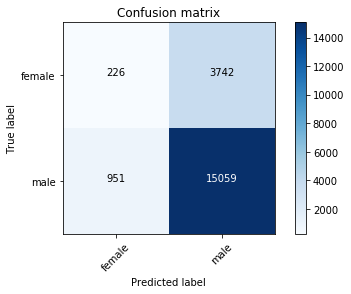

In [75]:
print accuracy_score(y_test, fr_p)
plot_confusion_matrix(confusion_matrix(y_test,fr_p), ['female','male'])

#### label encoding the entire set

In [55]:
def helper(x):
    try:
        return pd.factorize(x)[0]
    except:
        return x


#### notice many value changes, e.g. "label" value switched, so 0 rep male and 1 female

In [56]:
test1 = test1.apply(helper)
test1.head()

,about.chosen_role,about.hourly_rate,about.recommendations,about.role,about.responsivenessText,resume.certifications,resume.education,resume.exams,resume.experience,resume.publications,resume.show,skills,country.name,about.primary_language,timezone,summary.completion_rate,summary.earnings_score,summary.earnings_score_pc,summary.on_budget,summary.rating_score,summary.rehire_rate,summary.reviews,deposit_made,facebook_connected,payment_verified,phone_verified,profile_complete,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,2,1,0,0,0,0,1,0,0,0,2,2,0,2,1,1,1,1,1,1,1,1,0,0,1,1,0
4,1,3,0,0,0,0,0,0,0,0,0,3,3,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0
5,2,0,0,1,0,0,0,0,0,0,0,0,4,0,4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [57]:
print test1.shape
y=test1.pop('label')

(66593, 28)


In [58]:
from sklearn.model_selection import train_test_split
dim=lambda *x: [i.shape for i in x]
X_train, X_test, y_train, y_test = train_test_split(test1, y, test_size=0.3,
                                                   random_state=7)
dim(X_train, X_test, y_train, y_test)

[(46615, 27), (19978, 27), (46615,), (19978,)]

In [59]:
from parseHelper import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

In [60]:
%%time
fr=RandomForestClassifier(n_jobs=24)
fr.fit(X_train, y_train)
## predict labels
fr_p = fr.predict(X_test)
pd.Series(fr_p).value_counts()

CPU times: user 804 ms, sys: 36 ms, total: 840 ms
Wall time: 251 ms


0.77565321854
Confusion matrix, without normalization
[[15314   696]
 [ 3786   182]]


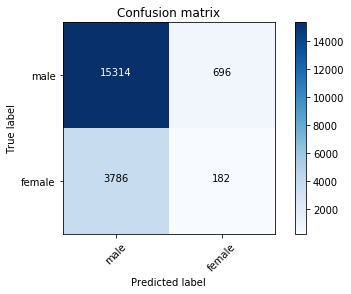

In [61]:
print accuracy_score(y_test, fr_p)
plot_confusion_matrix(confusion_matrix(y_test,fr_p), ['male','female'])